# (실습) 실전 예제: 붓꽃 데이터 분석

In [65]:
import platform
import matplotlib as mpl

# 윈도우 설정
if platform.system() == 'Windows':
    try:
        font_path = "C:/Windows/Fonts/malgun.ttf"  # '맑은 고딕' 폰트를 사용
        font = mpl.font_manager.FontProperties(fname=font_path).get_name()
        plt.rc('font', family=font)
    except FileNotFoundError:
        print("폰트 파일을 찾을 수 없습니다. 다른 경로를 확인하세요.")
# 우분투/구글 코랩 설정
elif platform.system() == 'Linux':
    # 우분투/구글코랩의 경우 아래 명령문이 최소 한번 실행되어야 함
    # !sudo apt-get install -y fonts-nanum*
    # !fc-cache -fv

    font = "NanumBarunGothic"
    if not any(map(lambda ft: ft.name == font, mpl.font_manager.fontManager.ttflist)):
        mpl.font_manager.fontManager.addfont("/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf")
    plt.rc("font", family=font)
    plt.rc("axes", unicode_minus=False)

In [66]:
# 넘파이
import numpy as np

# 램덤 시드
np.random.seed(12345)

# 어레이 사용되는 부동소수점들의 정확도 지정
np.set_printoptions(precision=4, suppress=True)

In [67]:
# 파이플롯
import matplotlib.pyplot as plt

# # 도표 크기 지정
plt.rc('figure', figsize=(10, 6))

아래 코드는 인터넷 데이터 저장소로부터 아이리스(붓꽃) 데이터(`iris.data`)를
2차원 넘파이 어레이로 불러온다.

- `np.genfromtxt()` 함수의 `dtype='str'` 키워드 옵션: 부동소수점과 문자열이 함께 포함된 데이터이기에 모두 문자열로 통일해서 불러오는 용도

In [68]:
import numpy as np

# 아이리스(붓꽃) 데이터 불러오기
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
iris = np.genfromtxt(url, delimiter=',', dtype='str')

`iris.data` 파일에는 아래 형식의 데이터가 150개 들어 있다.

```python
5.1,3.5,1.4,0.2,Iris-setosa
```

하나의 데이터에 사용된 값들은 하나의 아이리스(붓꽃)에 대한 꽃잎, 꽃받침과 관련된 특성(features)과 품종을 나타내며,
보다 구체적으로 아래 순서를 따른다.

```
꽃받침 길이, 꽃받침 너비, 꽃잎 길이, 꽃잎 너비, 품종
```

In [69]:
iris.shape

(150, 5)

길이와 너비를 저장하는 특성들은 원래 숫자이지만 위 코드는 문자열로 불러왔다.
처음 5개 데이터를 확인하면 다음과 같다.

__참고:__ `'<U15'`는 길이가 최대 15인 유니코드 문자열 자료형을 나타낸다.

In [70]:
iris[:5]

array([['5.1', '3.5', '1.4', '0.2', 'Iris-setosa'],
       ['4.9', '3.0', '1.4', '0.2', 'Iris-setosa'],
       ['4.7', '3.2', '1.3', '0.2', 'Iris-setosa'],
       ['4.6', '3.1', '1.5', '0.2', 'Iris-setosa'],
       ['5.0', '3.6', '1.4', '0.2', 'Iris-setosa']], dtype='<U15')

수치형 데이터와 품종 데이터를 분리해서 각각 (150,4), (150,) 모양의 어레이를 생성하자.
이때 수치형 데이터는 `'f8'`, 즉 `'float64'` 자료형을 사용하도록 한다.

In [71]:
iris_features = iris[:,:4].astype('f8') #수치는 str에서 float으로로
iris_labels = iris[:, 4]
iris_features


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [72]:
iris_features[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

150개의 데이터는 아래 세 개의 품종으로 구분되며, 각각 50개씩 아래 언급된 순서대로 구분되어 있다.

```
'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'
```

즉, 0번, 50번, 100번부터 각 품종의 데이터가 시작된다.

In [73]:
iris_labels[::50]

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype='<U15')

In [74]:
iris_labels[:5]

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa'], dtype='<U15')

In [75]:
iris_labels[50:55]

array(['Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor'], dtype='<U15')

In [76]:
iris_labels[100:105]

array(['Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica'], dtype='<U15')

**문제 1**

꽃잎 길이(2번 열)가 1.5보다 크거나 꽃받침 길이(0번 열)가 5.0보다 작은 데이터만 추출하라.

In [77]:
# None을 적절한 부울 표현식으로 대체하라.

mask = (iris_features[:,2] > 1.5) | (iris_features[:,0]<5)
iris_features[mask]



array([[4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.7, 3.8, 1.7, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [4.9, 3.1, 1.5, 0.1],
       [4.4, 3. , 1.3, 0.2],
       [4.5, 2.3, 1.3, 0.3],
       [4.4, 3.2, 1.3, 0.2],
       [5. , 3.5, 1.6, 0.6],
       [5.1, 3.8, 1.9, 0.4],
       [4.8, 3. , 1.4, 0.3],
       [5.1, 3.8, 1.6, 0.2],
       [4.6, 3.2, 1.4, 0.2],
       [7. , 3.2, 4.7, 1.4],
       [6.4, 3.2, 4.5, 1.5],
       [6.9, 3.1, 4.9, 1.5],
       [5.5, 2.3, 4. , 1.3],
       [6.5, 2.8, 4.6, 1.5],
       [5.7, 2

**문제 2**

꽃받침 길이(0번 열)와 꽃잎 길이(2번 열) 사이의 상관관계를 계산하라.

힌트: 넘파이의 적절한 함수를 활용한다. 상관계수에 대한 설명은 [위키백과: 상관분석](https://ko.wikipedia.org/wiki/상관_분석)을 참고한다.

In [78]:
sepal_length = iris_features[:, 0]
petal_length = iris_features[:, 2]
'''
    se      pe
se   1    0.8718
pe 0.8718   1
'''
np.corrcoef(sepal_length, petal_length)


array([[1.    , 0.8718],
       [0.8718, 1.    ]])

**문제 3**

아래 식으로 계산된 값을 갖는 새로운 열(column)이 추가된 2차원 어레이  `iris_features_added`를 생성하라.

$$\frac{\text{원주율} \times \text{꽃잎길이} \times \text{꽃받침길이}^2}{3} $$

힌트: `np.hstack()` 함수를 활용할 수 있다.

In [79]:
# pass와 None을 각각 적절한 코드와 표현식으로 대체하라.
'''
new_feature = ((3.14 * iris_features[:, 2] * iris_features[:, 0] ** 2)/3).reshape(-1, 1)
iris_features_added = np.hstack([iris_features, new_feature])
'''
iris_add = (np.pi * iris_features[:, 2] * (iris_features[:, 0]**2)) / 3
iris_features_added = np.hstack((iris_features,iris_add[:,np.newaxis]))
iris_features_added



array([[  5.1   ,   3.5   ,   1.4   ,   0.2   ,  38.1327],
       [  4.9   ,   3.    ,   1.4   ,   0.2   ,  35.2005],
       [  4.7   ,   3.2   ,   1.3   ,   0.2   ,  30.0724],
       [  4.6   ,   3.1   ,   1.5   ,   0.2   ,  33.2381],
       [  5.    ,   3.6   ,   1.4   ,   0.2   ,  36.6519],
       [  5.4   ,   3.9   ,   1.7   ,   0.4   ,  51.9117],
       [  4.6   ,   3.4   ,   1.4   ,   0.3   ,  31.0222],
       [  5.    ,   3.4   ,   1.5   ,   0.2   ,  39.2699],
       [  4.4   ,   2.9   ,   1.4   ,   0.2   ,  28.3832],
       [  4.9   ,   3.1   ,   1.5   ,   0.1   ,  37.7148],
       [  5.4   ,   3.7   ,   1.5   ,   0.2   ,  45.8044],
       [  4.8   ,   3.4   ,   1.6   ,   0.2   ,  38.6039],
       [  4.8   ,   3.    ,   1.4   ,   0.1   ,  33.7784],
       [  4.3   ,   3.    ,   1.1   ,   0.1   ,  21.299 ],
       [  5.8   ,   4.    ,   1.2   ,   0.2   ,  42.2733],
       [  5.7   ,   4.4   ,   1.5   ,   0.4   ,  51.0352],
       [  5.4   ,   3.9   ,   1.3   ,   0.4   ,  39.6972

In [80]:
# 아래 주석을 해제하고 실행하라.

assert iris_features_added.shape == (150, 5)
iris_features_added[:5]

array([[ 5.1   ,  3.5   ,  1.4   ,  0.2   , 38.1327],
       [ 4.9   ,  3.    ,  1.4   ,  0.2   , 35.2005],
       [ 4.7   ,  3.2   ,  1.3   ,  0.2   , 30.0724],
       [ 4.6   ,  3.1   ,  1.5   ,  0.2   , 33.2381],
       [ 5.    ,  3.6   ,  1.4   ,  0.2   , 36.6519]])

**문제 4**

`Iris_versicolor` 품종에 해당하는 데이터만 `iris_features`로부터 추출하라.

In [81]:
# None을 적절한 부울 표현식으로 대체하라.

mask = iris_labels == 'Iris-versicolor'
iris_features[mask]

array([[7. , 3.2, 4.7, 1.4],
       [6.4, 3.2, 4.5, 1.5],
       [6.9, 3.1, 4.9, 1.5],
       [5.5, 2.3, 4. , 1.3],
       [6.5, 2.8, 4.6, 1.5],
       [5.7, 2.8, 4.5, 1.3],
       [6.3, 3.3, 4.7, 1.6],
       [4.9, 2.4, 3.3, 1. ],
       [6.6, 2.9, 4.6, 1.3],
       [5.2, 2.7, 3.9, 1.4],
       [5. , 2. , 3.5, 1. ],
       [5.9, 3. , 4.2, 1.5],
       [6. , 2.2, 4. , 1. ],
       [6.1, 2.9, 4.7, 1.4],
       [5.6, 2.9, 3.6, 1.3],
       [6.7, 3.1, 4.4, 1.4],
       [5.6, 3. , 4.5, 1.5],
       [5.8, 2.7, 4.1, 1. ],
       [6.2, 2.2, 4.5, 1.5],
       [5.6, 2.5, 3.9, 1.1],
       [5.9, 3.2, 4.8, 1.8],
       [6.1, 2.8, 4. , 1.3],
       [6.3, 2.5, 4.9, 1.5],
       [6.1, 2.8, 4.7, 1.2],
       [6.4, 2.9, 4.3, 1.3],
       [6.6, 3. , 4.4, 1.4],
       [6.8, 2.8, 4.8, 1.4],
       [6.7, 3. , 5. , 1.7],
       [6. , 2.9, 4.5, 1.5],
       [5.7, 2.6, 3.5, 1. ],
       [5.5, 2.4, 3.8, 1.1],
       [5.5, 2.4, 3.7, 1. ],
       [5.8, 2.7, 3.9, 1.2],
       [6. , 2.7, 5.1, 1.6],
       [5.4, 3

**문제 5**

꽃받침 길이(0번 열)의 평균값(mean), 중앙값(median), 표준편차(standard deviation)를 구하라.

In [82]:
# None을 적절한 표현식으로 대체하라.
#mean과 std는 모듈에서 가져오는게 아닌 뒤에서 .mean() .std()쓰는게 더 좋을듯 
petal_length_mean = np.mean(iris_features[:,0])
petal_length_median = np.median(iris_features[:,0])
petal_length_std = np.std(iris_features[:,0])

print(petal_length_mean, petal_length_median, petal_length_std, sep='\n')

5.843333333333334
5.8
0.8253012917851409


**문제 6**

세 개의 품종 별 꽃받침 너비(1번 열)의 평균값을 계산하여
변수 `iris_kind_sepal_length`가 아래 사전을 가리키도록 하라.

```
{'Iris-setosa':3.418,
 'Iris-versicolor':2.77,
 'Iris-virginica':2.974}
```

In [83]:
# pass와 None을 각각 적절한 코드와 표현식으로 대체하라.
'''
setosa = iris_labels == 'Iris-setosa'
versicolor = iris_labels == 'Iris-versicolor'
virginica = iris_labels == 'Iris-virginica'
iris_setosa = iris_features[setosa]
iris_versicolor = iris_features[versicolor]
iris_virginica = iris_features[virginica]
setosa_s_l = np.mean(iris_setosa[:,1])
versicolor_s_l = np.mean(iris_versicolor[:,1])
virginica_s_l = np.mean(iris_virginica[:,1])



iris_kind_sepal_length = {'Iris-setosa':setosa_s_l, 'Iris-versicolor':round(versicolor_s_l,3), 'Iris-virginica':virginica_s_l}

iris_kind_sepal_length
'''

"\nsetosa = iris_labels == 'Iris-setosa'\nversicolor = iris_labels == 'Iris-versicolor'\nvirginica = iris_labels == 'Iris-virginica'\niris_setosa = iris_features[setosa]\niris_versicolor = iris_features[versicolor]\niris_virginica = iris_features[virginica]\nsetosa_s_l = np.mean(iris_setosa[:,1])\nversicolor_s_l = np.mean(iris_versicolor[:,1])\nvirginica_s_l = np.mean(iris_virginica[:,1])\n\n\n\niris_kind_sepal_length = {'Iris-setosa':setosa_s_l, 'Iris-versicolor':round(versicolor_s_l,3), 'Iris-virginica':virginica_s_l}\n\niris_kind_sepal_length\n"

In [84]:
labels = np.unique(iris_labels)

mask = iris_labels == 'Iris-setosa'
iris_features[:, 1][mask].mean()

iris_kind_sepal_length = dict()
for label in labels:
    mask = iris_labels == label
    label_mean = iris_features[:, 1][mask].mean()
    iris_kind_sepal_length[label] = np.round(label_mean, 3)

iris_kind_sepal_length

{'Iris-setosa': 3.418, 'Iris-versicolor': 2.77, 'Iris-virginica': 2.974}

In [85]:
assert (iris_kind_sepal_length == {'Iris-setosa':3.418,
                                   'Iris-versicolor':2.77,
                                   'Iris-virginica':2.974})

**문제 7**

`iris_features`에 사용된 모든 값을 특성별로 정규화(normalization)하라.

힌트: 꽃잎 너비 등 하나의 특성에 속하는 값을 모두 0과 1사이의 값으로 변환하는 작업을 정규화(normalization)라 한다.
정규화에 대한 설명은 [정규화/표준화](https://rucrazia.tistory.com/90)를 참고하라.

In [86]:
# None을 적절한 부울 표현식으로 대체하라.
min = iris_features.min(axis=0, keepdims=True)
max = iris_features.max(axis=0, keepdims=True)

iris_features_normalized = (iris_features - min) / (max - min)



아래 코드는 수정하지 마세요!!!

In [87]:
sol = np.array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
                [0.16666667, 0.41666667, 0.06779661, 0.04166667],
                [0.11111111, 0.5       , 0.05084746, 0.04166667],
                [0.08333333, 0.45833333, 0.08474576, 0.04166667],
                [0.19444444, 0.66666667, 0.06779661, 0.04166667]])

assert ~(iris_features_normalized.min(axis=0).all())
assert (iris_features_normalized.max(axis=0).all())
assert np.allclose(iris_features_normalized[:5], sol)

**문제 8**

`iris_features`에 사용된 모든 값을 특성별로 표준화(standardization)하라.

힌트: 꽃잎 너비 등 하나의 특성에 속하는 값들의 평균값은 0, 표준편차는 1이 되도록 항목을 변환하는 작업을 표준화(standardization)라 한다.
표준화에 대한 설명은 [정규화/표준화](https://rucrazia.tistory.com/90)를 참고하라.

In [88]:
# None을 적절한 부울 표현식으로 대체하라.
mean = iris_features.mean(axis=0,keepdims=True)
std = iris_features.std(axis=0,keepdims=True)

iris_features_standardized = (iris_features - mean) / std

In [89]:
# 아래 주석을 해제하고 실행하라.

iris_features_standardized[:5]

array([[-0.9007,  1.0321, -1.3413, -1.313 ],
       [-1.143 , -0.125 , -1.3413, -1.313 ],
       [-1.3854,  0.3378, -1.3981, -1.313 ],
       [-1.5065,  0.1064, -1.2844, -1.313 ],
       [-1.0218,  1.2635, -1.3413, -1.313 ]])

**문제 9**

아래 코드는 붓꽃 데이터의 산점도를 품종에 따라 다른 모양과 색을 갖는 산점도를 그린다.

In [90]:
X = iris_features[:, 2] # 꽃잎 길이
Y = iris_features[:, 3] # 꽃잎 너비

points_x = np.arange(0, 7.01, 0.02)
points_y = np.arange(0, 3.51, 0.02)
xs, ys = np.meshgrid(points_x, points_y)

Z = np.zeros(xs.shape)
Z

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

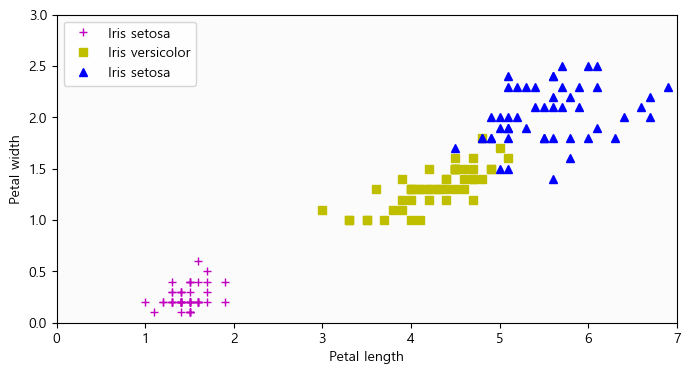

In [91]:
plt.figure(figsize=(8, 4))

# 등고선을 색으로 구분
plt.contourf(xs, ys, Z, alpha=0.1, cmap='Purples')

# 붓꽃 데이터 산점도
plt.plot(X[iris_labels == 'Iris-setosa'], Y[iris_labels == 'Iris-setosa'], 'm+', label='Iris setosa')
plt.plot(X[iris_labels == 'Iris-versicolor'], Y[iris_labels == 'Iris-versicolor'], 'ys', label='Iris versicolor')
plt.plot(X[iris_labels == 'Iris-virginica'], Y[iris_labels == 'Iris-virginica'], 'b^',  label='Iris setosa')

plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")
plt.axis([0, 7.0, 0, 3])

# plt.grid()
plt.show()

위 코드에 사용된 2차원 어레이 `Z`를 수정하여 아래 산점도를 그리는 코드를 작성하려 한다.

<p><div align="center"><img src="https://raw.githubusercontent.com/codingalzi/datapy/master/jupyter-book//images/iris-classification.png" style="width:70%;"></div></p>

이를 위해 영역을 구분하는 두 개의 직선은 다음 두 개의 직선 방정식을 이용한다.

```
y = x + 3
y = x + 6.6
```

**질문**

아래 코드는 세 개의 영역을 구분하는 세 개의 마스크를 지정한다.
`None`을 모두 적절한 어레이 논리식으로 대체하라.

In [92]:
'''
mask1 = xs-3 <= ys
mask2 = (xs-3 > ys) & (xs-6.6 < ys)
mask3 = xs-6.6 >= ys
#왜 -는 되는데 +는 안되지
'''
mask1 = xs + ys - 3.0 <= 0
mask2 = (xs + ys - 3.0 > 0) & (xs + ys - 6.6 <= 0)
mask3 = (xs + ys - 6.6 > 0)

정해진 마스크에 따라 등고선 어레이 `Z`의 값을 0, 1, 2 중에 하나로 지정한다.

In [93]:
Z[mask1] = 0
Z[mask2] = 1
Z[mask3] = 2


수정된 등고선 어레이 `Z`를 이용하여 산점도를 그린다.

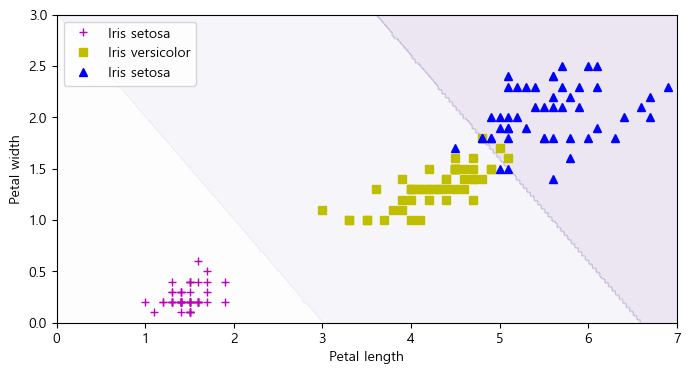

In [94]:
plt.figure(figsize=(8, 4))

# 등고선을 색으로 구분
plt.contourf(xs, ys, Z, alpha=0.1, cmap='Purples')

# 붓꽃 데이터 산점도
plt.plot(X[iris_labels == 'Iris-setosa'], Y[iris_labels == 'Iris-setosa'], 'm+', label='Iris setosa')
plt.plot(X[iris_labels == 'Iris-versicolor'], Y[iris_labels == 'Iris-versicolor'], 'ys', label='Iris versicolor')
plt.plot(X[iris_labels == 'Iris-virginica'], Y[iris_labels == 'Iris-virginica'], 'b^',  label='Iris setosa')

plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")
plt.axis([0, 7.0, 0, 3])

# plt.grid()
plt.show()